# First Analysis - RJ Election 2022
Apresenta a primeira análise dos dados com uma exibição base em python.

Exibe o tipo dos dados coletados em tabelas e permite uma observação primitiva de sua organização.

In [7]:
# Import de bibliotecas

!pip install esda libpysal splot

try:
  import matplotlib
  print('Matplotlib is already installed!')
  print(f'Matplotlib version: {matplotlib.__version__}\n')
except ImportError:
  print('Installing Matplotlib...')
  !pip install matplotlib

try:
  import numpy
  print('Numpy is already installed!')
  print(f'Numpy version: {numpy.__version__}\n')
except ImportError:
  print('Installing Numpy...')
  !pip install numpy

try:
  import pandas
  print('Pandas is already installed!')
  print(f'Pandas version: {pandas.__version__}\n')
except ImportError:
  print('Installing Pandas...')
  !pip install pandas

try:
    import geopandas as gpd
    print('GeoPandas is already installed!')
    print(f'GeoPandas version: {gpd.__version__}\n')
except ImportError:
    print('Installing GeoPandas...')
    !pip install geopandas
    import geopandas as gpd
    print(f'GeoPandas version: {gpd.__version__}\n')

try:
  import pyarrow as pa
  print('PyArrow is already installed!')
  print(f'PyArrow version: {pa.__version__}\n')
except ImportError:
  print('Installing PyArrow...')
  !pip install pyarrow

try:
  import os
  print('OS is already installed!')
except ImportError:
  print('Installing OS...')
  !pip install os


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Matplotlib is already installed!
Matplotlib version: 3.10.0

Numpy is already installed!
Numpy version: 2.1.1

Pandas is already installed!
Pandas version: 2.2.2

GeoPandas is already installed!
GeoPandas version: 1.0.1

PyArrow is already installed!
PyArrow version: 22.0.0

OS is already installed!


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyarrow as pa
from libpysal.weights import Queen
from esda.moran import Moran
import matplotlib.pyplot as plt
import requests

import geopandas as gpd

In [9]:
# Caminho dos dados

path_alfabetizacao_csv = "./DADOS/Alfabetizacao/Agregados_por_municipios_alfabetizacao_BR.csv"
path_seguranca_csv = "./DADOS/Seguranca/BaseMunicipioMensal.csv"
# path_votos_TSE_csv = "./DADOS/TSE/votacao_candidato_munzona_2022_RJ.csv"
path_malha_zip = "./DADOS/MalhaGeometrica/rj_municipios.zip"
path_votos_TSE_csv = "./DADOS/TSE/votos_filtrados.csv"


# Leitura dos arquivos para dataframes -> usando pandas

# Lê o arquivo CSV e carrega em um DataFrame
df_alfabetizacao = pd.read_csv(path_alfabetizacao_csv,  encoding='latin1', sep=';')
df_seguranca = pd.read_csv(path_seguranca_csv,  encoding='latin1', sep=';')

# df_votos = pd.read_csv(path_votos_TSE_csv, encoding='latin1', sep='')
df_votos = pd.read_csv(path_votos_TSE_csv, encoding='latin1', sep=';')

In [10]:
# Verificação das primeiras linhas dos dados

# Exibe as primeiras 5 linhas do DataFrame
print("Data frame de alfabetização: \n")
print(df_alfabetizacao.head())

print("Data frame de segurança: \n")
print(df_seguranca.head())
# print(df_votos.head())

Data frame de alfabetização: 

    CD_MUN                 NM_MUN  V00644  V00645  V00646  V00647  V00648  \
0  1100015  Alta Floresta D'Oeste    1644    1514    1557    1643    1511   
1  1100023              Ariquemes    7666    8193    8053    7656    7741   
2  1100031                 Cabixi     373     246     306     373     402   
3  1100049                 Cacoal    6299    7292    7282    7029    6858   
4  1100056             Cerejeiras    1142    1044    1275    1285    1222   

   V00649  V00650  V00651  ...  V00996  V00997  V00998  V00999  V01000  \
0    1576    1541    1352  ...     109     226     119      40      73   
1    7404    6582    5774  ...     484    1106     506     328     591   
2     425     338     399  ...       3      29      21       3       9   
3    6765    5774    5377  ...     489    1181     401     279     430   
4    1142    1083     967  ...     101     172      84      36      90   

   V01001  V01002  V01003  V01004  V01005  
0      51     107

In [11]:
rj = gpd.read_file('./DADOS/MalhaGeometrica/rj_municipios/33MUE250GC_SIR.shp')
rj.head()


,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.0895 -21.62893, -42.08912 -21.62..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."


<Axes: >

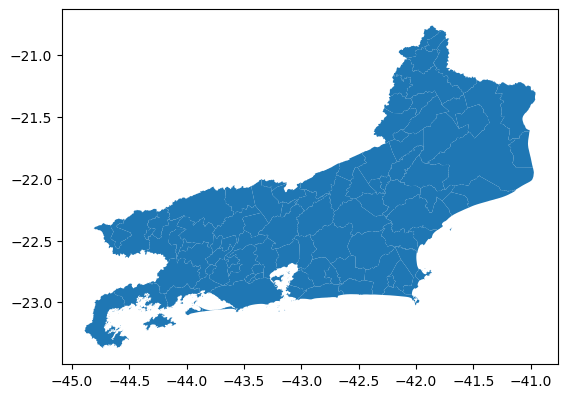

In [12]:
rj.plot()

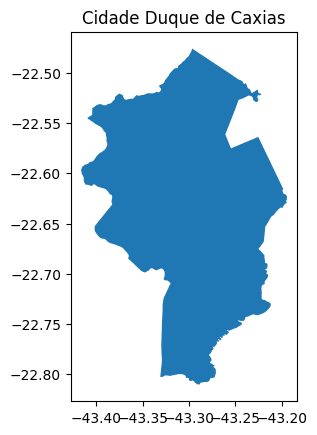

In [13]:
duque_de_caxias_city = rj[rj.NM_MUNICIP == 'DUQUE DE CAXIAS'].reset_index(drop=True)
ax2 = duque_de_caxias_city.plot()
ax2.set_title('Cidade Duque de Caxias');

In [14]:
# Solução: Adicionar encoding='latin-1'
df_raw = pd.read_csv(path_votos_TSE_csv, header=None, encoding='latin-1')

# O resto do seu código de tratamento manual funcionará normalmente:
df_votos = df_raw[0].str.replace('"', '').str.split(';', expand=True)

df_votos.columns = df_votos.iloc[0]
df_votos = df_votos[1:] 

df_votos = df_votos.reset_index(drop=True)

# Agora os prints devem funcionar
print(df_votos.head())
print(df_votos.columns[:10])
print(df_votos.shape)

0 CD_ELEICAO                      DS_ELEICAO CD_MUNICIPIO     NM_MUNICIPIO  \
0        546  ELEIÇÕES GERAIS ESTADUAIS 2022        58335  DUQUE DE CAXIAS   
1        546  ELEIÇÕES GERAIS ESTADUAIS 2022        58076      BARRA MANSA   
2        546  ELEIÇÕES GERAIS ESTADUAIS 2022        58335  DUQUE DE CAXIAS   
3        546  ELEIÇÕES GERAIS ESTADUAIS 2022        58173          CAMBUCI   
4        546  ELEIÇÕES GERAIS ESTADUAIS 2022        58335  DUQUE DE CAXIAS   

0 NR_CANDIDATO                       NM_CANDIDATO NR_PARTIDO SG_PARTIDO  \
0        12019            ANDREA APARECIDA ROSENO         12        PDT   
1        12022  LUCIANE COSTA DOS SANTOS FERREIRA         12        PDT   
2        12120     PAULO FERNANDO MARTINS ANTUNES         12        PDT   
3        12023              FELIPE BARROS CARDOSO         12        PDT   
4        12025            JOSIAS DA SILVA MOREIRA         12        PDT   

0                       NM_PARTIDO NM_TIPO_DESTINACAO_VOTOS  \
0  Partido Democr

In [15]:
df_votos.head()

,CD_ELEICAO,DS_ELEICAO,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,NM_TIPO_DESTINACAO_VOTOS,QT_VOTOS_NOMINAIS_VALIDOS,DS_SIT_TOT_TURNO
0,546,ELEIÇÕES GERAIS ESTADUAIS 2022,58335,DUQUE DE CAXIAS,12019,ANDREA APARECIDA ROSENO,12,PDT,Partido Democrático Trabalhista,Válido,3,SUPLENTE
1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,58076,BARRA MANSA,12022,LUCIANE COSTA DOS SANTOS FERREIRA,12,PDT,Partido Democrático Trabalhista,Válido,0,SUPLENTE
2,546,ELEIÇÕES GERAIS ESTADUAIS 2022,58335,DUQUE DE CAXIAS,12120,PAULO FERNANDO MARTINS ANTUNES,12,PDT,Partido Democrático Trabalhista,Válido,4,SUPLENTE
3,546,ELEIÇÕES GERAIS ESTADUAIS 2022,58173,CAMBUCI,12023,FELIPE BARROS CARDOSO,12,PDT,Partido Democrático Trabalhista,Válido,0,SUPLENTE
4,546,ELEIÇÕES GERAIS ESTADUAIS 2022,58335,DUQUE DE CAXIAS,12025,JOSIAS DA SILVA MOREIRA,12,PDT,Partido Democrático Trabalhista,Válido,2,SUPLENTE


In [16]:
# Quantidade de municipios em cada dataframe (usando .unique)
print("Quantidade de municípios DF_Alfabetização:", df_alfabetizacao['CD_MUN'].nunique())
print("Quantidade de municípios DF_Segurança:", df_seguranca['fmun_cod'].nunique())
print("Quantidade de municípios Malha Geométrica RJ:", rj['CD_GEOCODM'].nunique())
print("Quantidade de municípios DF_Votos_TSE:", df_votos['CD_MUNICIPIO'].nunique())

Quantidade de municípios DF_Alfabetização: 5570
Quantidade de municípios DF_Segurança: 92
Quantidade de municípios Malha Geométrica RJ: 92
Quantidade de municípios DF_Votos_TSE: 92


In [17]:
# Células em branco
print("Quantidade de células em branco DF_Alfabetização:", df_alfabetizacao.isnull().sum().sum())
print("Quantidade de células em branco DF_Segurança:", df_seguranca.isnull().sum().sum())
print("Quantidade de células em branco Malha Geométrica RJ:", rj.isnull().sum().sum())
print("Quantidade de células em branco DF_Votos_TSE:", df_votos.isnull().sum().sum())


Quantidade de células em branco DF_Alfabetização: 0
Quantidade de células em branco DF_Segurança: 0
Quantidade de células em branco Malha Geométrica RJ: 0
Quantidade de células em branco DF_Votos_TSE: 0


In [18]:
# Dados duplicados
print("Quantidade de dados duplicados DF_Alfabetização:", df_alfabetizacao.duplicated().sum())
print("Quantidade de dados duplicados DF_Segurança:", df_seguranca.duplicated().sum())
print("Quantidade de dados duplicados Malha Geométrica RJ:", rj.duplicated().sum())
print("Quantidade de dados duplicados DF_Votos_TSE:", df_votos.duplicated().sum())

Quantidade de dados duplicados DF_Alfabetização: 0
Quantidade de dados duplicados DF_Segurança: 0
Quantidade de dados duplicados Malha Geométrica RJ: 0
Quantidade de dados duplicados DF_Votos_TSE: 83471


In [19]:
# Filtro das colunas necessárias de alfabetização

path_alfabetizacao_csv_filtrado = "./DADOS/Alfabetizacao/por_municipio_filtrado_categorias_totais.csv"

if not os.path.exists(path_alfabetizacao_csv_filtrado):
    # Le CSV novamente por garantia
    df_alfabetizacao = pd.read_csv(path_alfabetizacao_csv, sep=';', encoding='latin1')

    df_alfabetizacao.columns = df_alfabetizacao.columns.str.strip()
    print("Colunas do CSV:", df_alfabetizacao.columns.tolist())

    colunas_base = ["CD_MUN", "NM_MUN"]
    colunas_base_existentes = [c for c in colunas_base if c in df_alfabetizacao.columns]

    if len(colunas_base_existentes) < len(colunas_base):
        raise ValueError(f"Algumas colunas base não existem no CSV: {colunas_base}.\nColunas existentes: {df_alfabetizacao.columns.tolist()}")

    # Filtrar apenas as colunas V00748 a V00760 presentes no CSV
    colunas_alfabetizacao = []
    for i in range(48, 61):  # de 48 até 60
        col = f"V007{i}"
        if col in df_alfabetizacao.columns:
            colunas_alfabetizacao.append(col)


    colunas_desejadas = colunas_base_existentes + colunas_alfabetizacao

    df_filtrado = df_alfabetizacao[colunas_desejadas]

    # Salvar CSV filtrado pronto
    df_filtrado.to_csv(path_alfabetizacao_csv_filtrado, sep=';', index=False, quoting=1, encoding='latin1')

    print(f"✅ CSV filtrado criado com sucesso: {path_alfabetizacao_csv_filtrado}")
else:
    print(f"📌 Arquivo já existe: {path_alfabetizacao_csv_filtrado}")

# Filtro das linhas necessárias de alfabetização - SOMENTE RJ
path_tse = "./DADOS/TSE/municipios_brasileiros_tse.csv"
path_final = "./DADOS/Alfabetizacao/por_municipio_RJ.csv"
if not os.path.exists(path_final):

    df_alf = pd.read_csv(path_alfabetizacao_csv_filtrado, sep=';', encoding='latin1')
    df_tse = pd.read_csv(path_tse, sep=',', encoding='latin1')

    # Normalização
    df_alf.columns = df_alf.columns.str.strip()
    df_tse.columns = df_tse.columns.str.strip()

    # Converter COD_IBGE para string e padronizar com zeros à esquerda
    df_alf["CD_MUN"] = df_alf["CD_MUN"].astype(str).str.zfill(7)
    df_tse["codigo_ibge"] = df_tse["codigo_ibge"].astype(str).str.zfill(7)

    # Filtrar apenas municípios do RJ usando merge
    df_merged = df_alf.merge(df_tse[["uf", "codigo_ibge"]],
                              left_on="CD_MUN", right_on="codigo_ibge",
                              how="inner")

    df_rj = df_merged[df_merged["uf"] == "RJ"]

    colunas_base = ["CD_MUN", "NM_MUN"]
    colunas_alfabetizacao = []
    for i in range(48, 61):
        col = f"V007{i}"
        if col in df_alfabetizacao.columns:
            colunas_alfabetizacao.append(col)
    colunas_desejadas = colunas_base + colunas_alfabetizacao

    df_rj_final = df_rj[colunas_desejadas]

    df_rj_final.to_csv(path_final, sep=';', index=False, quoting=1, encoding='latin1')

    print(f"✅ Arquivo filtrado do RJ criado com sucesso: {path_final}")
else:
    print(f"📌 Arquivo já existe: {path_final}")



📌 Arquivo já existe: ./DADOS/Alfabetizacao/por_municipio_filtrado_categorias_totais.csv
📌 Arquivo já existe: ./DADOS/Alfabetizacao/por_municipio_RJ.csv


In [20]:
# Filtro dos dados de segurança - por colunas
path_seg_ano = "./DADOS/Seguranca/seguranca_municipios_ano.csv"

if not os.path.exists(path_seg_ano):
    path_seg = "./DADOS/Seguranca/BaseMunicipioMensal.csv"
    df_seg = pd.read_csv(path_seg, sep=';', encoding='latin1', engine='python')

    df_seg.columns = df_seg.columns.str.strip()

    colunas_base = ["fmun_cod", "fmun", "ano"]
    colunas_totais = ["total_roubos", "total_furtos", "registro_ocorrencias"]

    # Verificar se todas as colunas existem
    for col in colunas_base + colunas_totais:
        if col not in df_seg.columns:
            raise KeyError(f"Coluna '{col}' não encontrada. Colunas disponíveis: {df_seg.columns.tolist()}")

    df_seg = df_seg[colunas_base + colunas_totais]

    # Agrupar por município e ano, somando os valores
    df_agrupado = df_seg.groupby(["fmun_cod", "fmun", "ano"], as_index=False).sum()

    df_agrupado.to_csv(path_seg_ano, sep=';', index=False, quoting=1, encoding='latin1')
    print(f"✅ CSV de segurança anual criado: {path_seg_ano}")

else:
    print(f"📌 Arquivo já existe, não será recriado: {path_seg_ano}")


# Filtro dos dados de segurança - por linhas, mantendo apenas o ano de 2021 como interesse
path_seg_2021 = "./DADOS/Seguranca/seguranca_municipios_2021.csv"

if not os.path.exists(path_seg_2021):
    df_ano = pd.read_csv(path_seg_ano, sep=';', encoding='latin1', engine='python')

    # ---- Filtrar apenas o ano de 2021 ----
    df_2021 = df_ano[df_ano["ano"] == 2021].copy()

    # ---- Salvar CSV filtrado ----
    df_2021.to_csv(path_seg_2021, sep=';', index=False, quoting=1, encoding='latin1')
    print(f"✅ CSV de segurança apenas 2021 criado: {path_seg_2021}")

else:
    print(f"📌 Arquivo já existe, não será recriado: {path_seg_2021}")

📌 Arquivo já existe, não será recriado: ./DADOS/Seguranca/seguranca_municipios_ano.csv
📌 Arquivo já existe, não será recriado: ./DADOS/Seguranca/seguranca_municipios_2021.csv


In [21]:
# Arquivo de origem, disponivel em https://dadosabertos.tse.jus.br/dataset/resultados-2022/resource/40fdcf49-256a-4c81-87cf-711545bd1528
path_votos_TSE_csv = "./DADOS/TSE/votacao_candidato_munzona_2022_RJ.csv" 

# Filtro por linhas, mantendo apenas os dados de candidatos a deputado estadual no RJ
path_votos_deputado_estadual = "./DADOS/TSE/votos_deputado_estadual_RJ_2022.csv"
if not os.path.exists(path_votos_deputado_estadual):
    df_urnas = pd.read_csv(path_votos_TSE_csv, sep=';', encoding='latin1', engine='python')

    # Filtrar apenas candidatos a deputado estadual (CD_CARGO = 7)
    df_deputado_estadual = df_urnas[df_urnas['CD_CARGO'] == 7].copy()

    # Salvar CSV filtrado
    df_deputado_estadual.to_csv(path_votos_deputado_estadual, sep=';', index=False, quoting=1, encoding='latin1')

    print(f"✅ CSV de votos para deputado estadual criado: {path_votos_deputado_estadual}")
else:
    print(f"📌 Arquivo já existe, não será recriado: {path_votos_deputado_estadual}")
    
# MANTENDO AS COLUNAS RELEVANTES DOS DADOS DE VOTOS
path_votos_filtrados = "./DADOS/TSE/votos_filtrados.csv" # Arquivo de destino
if not os.path.exists(path_votos_filtrados):
    df_urnas = pd.read_csv(path_votos_deputado_estadual, sep=';', encoding='latin1', engine='python')

    df_urnas.columns = df_urnas.columns.str.strip()

    colunas_votos = [
        'CD_ELEICAO', 'DS_ELEICAO',
        'CD_MUNICIPIO', 'NM_MUNICIPIO',
        'NR_CANDIDATO', 'NM_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
        'NM_TIPO_DESTINACAO_VOTOS','QT_VOTOS_NOMINAIS_VALIDOS', 'DS_SIT_TOT_TURNO'
    ]   

    # Verificar se todas as colunas existem
    for col in colunas_votos:
        if col not in df_urnas.columns:
            raise KeyError(f"Coluna '{col}' não encontrada. Colunas disponíveis: {df_urnas.columns.tolist()}")

    df_urnas = df_urnas[colunas_votos].copy() # Adicionado .copy() por segurança

    # Salvar no caminho de destino (path_votos_filtrados)
    df_urnas.to_csv(path_votos_filtrados, sep=';', index=False, quoting=1, encoding='latin1')
    
    # Imprimir o caminho de destino (path_votos_filtrados)
    print(f"✅ CSV de votos filtrados criado: {path_votos_filtrados}")

else:
    print(f"📌 Arquivo já existe, não será recriado: {path_votos_filtrados}")


FileNotFoundError: [Errno 2] No such file or directory: './DADOS/TSE/votacao_candidato_munzona_2022_RJ.csv'

In [22]:
# Análise estatística de furtos no estado (arquivo segurança_municipios)

df_seg = pd.read_csv("./DADOS/Seguranca/seguranca_municipios_2021.csv", sep=';', encoding='latin1')

media_furtos = df_seg["total_furtos"].mean()
media_roubos = df_seg["total_roubos"].mean()

print(f"Média de furtos por município (2021): {media_furtos:.2f}")
print(f"Média de roubos por município (2021): {media_roubos:.2f}")

max_furtos = df_seg.loc[df_seg["total_furtos"].idxmax(), ["fmun", "total_furtos"]]
min_furtos = df_seg.loc[df_seg["total_furtos"].idxmin(), ["fmun", "total_furtos"]]

print(f"Município com mais furtos: {max_furtos['fmun']} ({max_furtos['total_furtos']} casos)")
print(f"Município com menos furtos: {min_furtos['fmun']} ({min_furtos['total_furtos']} casos)")

Média de furtos por município (2021): 1245.89
Média de roubos por município (2021): 1256.99
Município com mais furtos: Rio de Janeiro (67913 casos)
Município com menos furtos: São José de Ubá (6 casos)


In [23]:
df_alf = pd.read_csv("./DADOS/Alfabetizacao/por_municipio_RJ.csv", sep=';', encoding='latin1')

cols_num = [c for c in df_alf.columns if c.startswith("V007")]
df_alf[cols_num] = df_alf[cols_num].apply(pd.to_numeric, errors='coerce')

# Média geral de alfabetização (exemplo: soma de alfabetizados / total)
df_alf["alf_15_29"] = df_alf[["V00748", "V00749", "V00750"]].mean(axis=1)
df_alf["alf_30_44"] = df_alf[["V00751", "V00752", "V00753"]].mean(axis=1)
df_alf["alf_45_59"] = df_alf[["V00754", "V00755", "V00756"]].mean(axis=1)
df_alf["alf_60_79"] = df_alf[["V00757", "V00758", "V00759"]].mean(axis=1)
df_alf["alf_80_mais"] = df_alf[["V00760"]]

medias_estado = {
    "15 a 29 anos": df_alf["alf_15_29"].mean(),
    "30 a 44 anos": df_alf["alf_30_44"].mean(),
    "45 a 59 anos": df_alf["alf_45_59"].mean(),
    "60 a 79 anos": df_alf["alf_60_79"].mean(),
    "80 anos ou mais": df_alf["alf_80_mais"].mean()
}

print("Médias de pessoas alfabetizadas por faixa etária no estado do RJ:")
for faixa, media in medias_estado.items():
    print(f"{faixa}: {media:.2f}")

Médias de pessoas alfabetizadas por faixa etária no estado do RJ:
15 a 29 anos: 11836.78
30 a 44 anos: 13040.00
45 a 59 anos: 11086.16
60 a 79 anos: 8707.87
80 anos ou mais: 4003.92


In [24]:
# Município com maior e menor taxa de alfabetização

df_alf["total_alfabetizados"] = df_alf[[c for c in df_alf.columns if c.startswith("V007")]].sum(axis=1)

maior = df_alf.loc[df_alf["total_alfabetizados"].idxmax(), ["NM_MUN", "total_alfabetizados"]]
menor = df_alf.loc[df_alf["total_alfabetizados"].idxmin(), ["NM_MUN", "total_alfabetizados"]]

print(f"Município com maior número de alfabetizados: {maior['NM_MUN']} ({maior['total_alfabetizados']} pessoas)")
print(f"Município com menor número de alfabetizados: {menor['NM_MUN']} ({menor['total_alfabetizados']} pessoas)")

Município com maior número de alfabetizados: Rio de Janeiro (5029309 pessoas)
Município com menor número de alfabetizados: Macuco (4106 pessoas)


In [25]:
# Razão Furto/Roubo - Indicador de tipo de crime predominante no estado 

df_seg["razao_furto_roubo"] = df_seg["total_furtos"] / df_seg["total_roubos"]
media_razao = df_seg["razao_furto_roubo"].replace([float('inf'), -float('inf')], None).dropna().mean()
print(f"Média razão furto/roubo no estado:  {media_razao:.2f}")

Média razão furto/roubo no estado:  8.60


In [26]:
# Correlação entre furtos e roubos

correlacao = df_seg["total_furtos"].corr(df_seg["total_roubos"])
print(f"Correlação entre furtos e roubos (2021): {correlacao:.2f}")

Correlação entre furtos e roubos (2021): 0.99


In [ ]:
# Apresentar imagem do OMT-G 

In [28]:
# 1. Preparo inicial: Hierarquia do IBGE
print("Pegando Hierarquia do IBGE...")
url_ibge = "https://servicodados.ibge.gov.br/api/v1/localidades/estados/33/municipios?view=nivelado"
df_hierarchy = pd.read_json(url_ibge)

# Extração de colunas relevantes e garantia de que ID é string para merge
df_hierarchy = df_hierarchy[['municipio-id', 'regiao-imediata-nome', 'regiao-intermediaria-nome']]
df_hierarchy['municipio-id'] = df_hierarchy['municipio-id'].astype(str)

# 2. MERGE: Combinação de Geometria, Dados e Hierarquia

# Garante que a chave do Shapefile (geometria) seja string
rj['CD_GEOCODM'] = rj['CD_GEOCODM'].astype(str)

# --- CORREÇÃO AQUI: Garante que a chave dos dados de Alfabetização também seja string ---
df_alf['CD_MUN'] = df_alf['CD_MUN'].astype(str)

# Define a variável alvo
target_variable = 'total_alfabetizados' 

# Confere se existe 'total_alfabetizados' e cria se necessário
if 'total_alfabetizados' not in df_alf.columns:
     cols_num = [c for c in df_alf.columns if c.startswith("V007")]
     df_alf["total_alfabetizados"] = df_alf[cols_num].sum(axis=1)

# Agora o merge deve funcionar pois ambos são strings (object)
gdf_master = rj.merge(df_alf, left_on='CD_GEOCODM', right_on='CD_MUN', how='inner')
gdf_master = gdf_master.merge(df_hierarchy, left_on='CD_GEOCODM', right_on='municipio-id', how='inner')

print(f"Criado Master GeoDataFrame com {len(gdf_master)} municípios.")

Pegando Hierarquia do IBGE...
Criado Master GeoDataFrame com 92 municípios.


In [29]:
# 3. Agregação por região

# Região Imediata
gdf_immediate = gdf_master.dissolve(by='regiao-imediata-nome', aggfunc={target_variable: 'sum'})

# Região Intermediária
gdf_intermediate = gdf_master.dissolve(by='regiao-intermediaria-nome', aggfunc={target_variable: 'sum'})

In [30]:
# 4. Autocorrelação Espacial (Moran's I)

def calculate_moran(gdf, lvl_name, variable):
    # Matriz com peso (Queen)
    w = Queen.from_dataframe(gdf)
    w.transform = 'r'
    
    # Calcula global Moran's I
    y = gdf[variable].values
    moran = Moran(y, w)
    
    print(f"\n--- Spatial Autocorrelation: {lvl_name} ---")
    print(f"Variable: {variable}")
    print(f"Geographic Units: {len(gdf)}")
    print(f"Moran's I: {moran.I:.4f}")
    print(f"P-value: {moran.p_sim:.4f}")
    
    return moran

# Run a análise para os 3 níveis
print("COMPARATIVE SPATIAL ANALYSIS")
moran_mun = calculate_moran(gdf_master, "Municipal Level", target_variable)
moran_imm = calculate_moran(gdf_immediate, "Immediate Region Level", target_variable)
moran_int = calculate_moran(gdf_intermediate, "Intermediate Region Level", target_variable)

COMPARATIVE SPATIAL ANALYSIS


/tmp/ipykernel_3627/2563657402.py:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)



--- Spatial Autocorrelation: Municipal Level ---
Variable: total_alfabetizados
Geographic Units: 92
Moran's I: 0.0855
P-value: 0.0100

--- Spatial Autocorrelation: Immediate Region Level ---
Variable: total_alfabetizados
Geographic Units: 14
Moran's I: -0.1240
P-value: 0.1160

--- Spatial Autocorrelation: Intermediate Region Level ---
Variable: total_alfabetizados
Geographic Units: 5
Moran's I: -0.2658
P-value: 0.4340


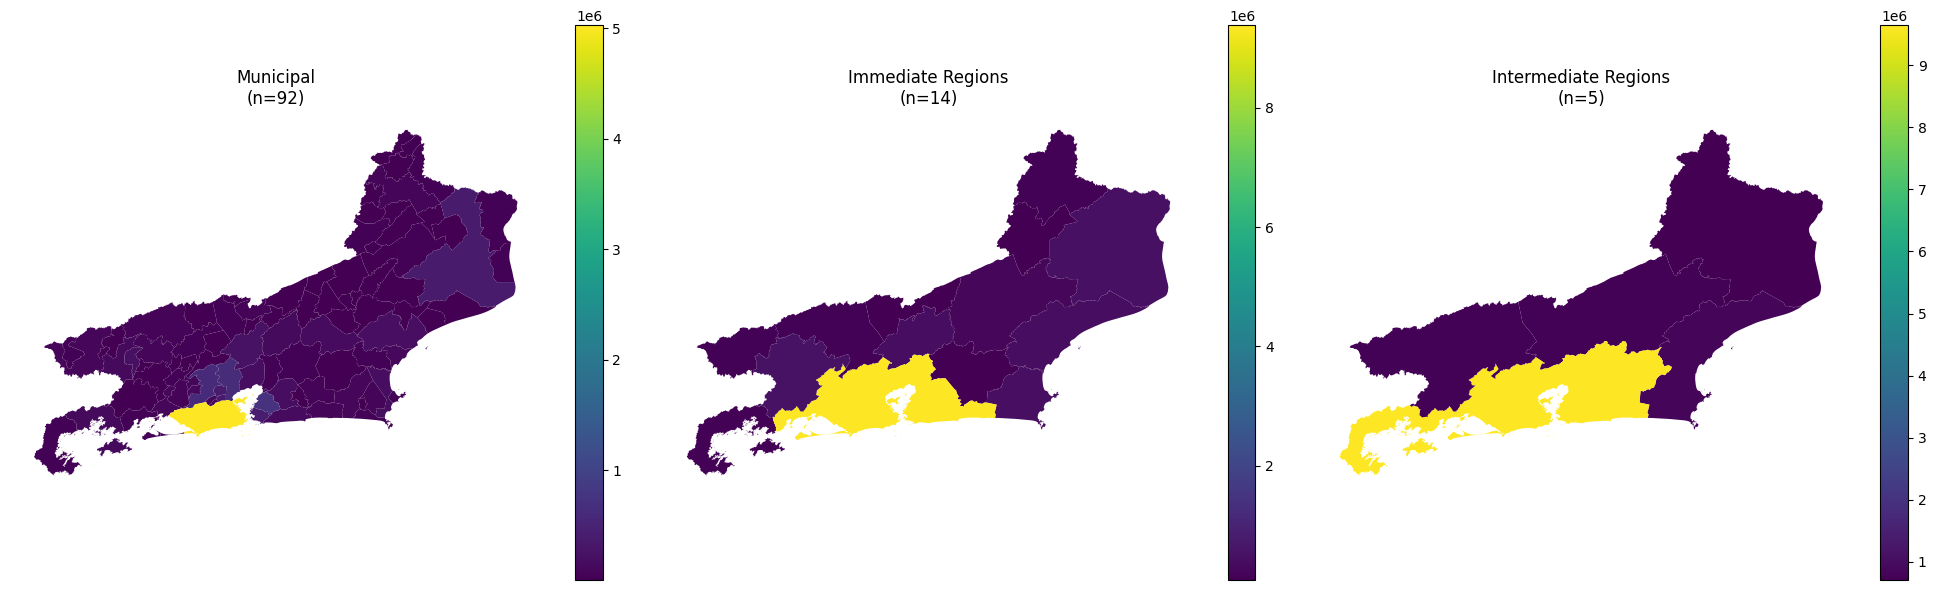

In [32]:
# 5. Agregações plotadas
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

gdf_master.plot(column=target_variable, ax=axes[0], legend=True, cmap='viridis')
axes[0].set_title(f'Municipal\n(n={len(gdf_master)})')
axes[0].axis('off')

gdf_immediate.plot(column=target_variable, ax=axes[1], legend=True, cmap='viridis')
axes[1].set_title(f'Immediate Regions\n(n={len(gdf_immediate)})')
axes[1].axis('off')

gdf_intermediate.plot(column=target_variable, ax=axes[2], legend=True, cmap='viridis')
axes[2].set_title(f'Intermediate Regions\n(n={len(gdf_intermediate)})')
axes[2].axis('off')

plt.tight_layout()
plt.show()